<a href="https://colab.research.google.com/github/oyyarko/deeplearning_cnn/blob/master/MNIST_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


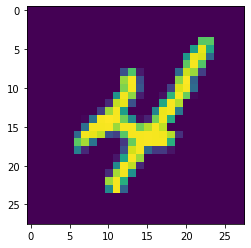

In [0]:
plt.imshow(x_train[9])

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [0]:
x_train[0].shape

(28, 28, 1)

In [0]:
input_shape = x_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size= (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2444 - acc: 0.9261 - val_loss: 0.0519 - val_acc: 0.9828
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0899 - acc: 0.9738 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0681 - acc: 0.9793 - val_loss: 0.0343 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0552 - acc: 0.9828 - val_loss: 0.0327 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0463 - acc: 0.9854 - val_loss: 0.0317 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0396 - acc: 0.9870 - val_loss: 0.0350 - val_acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0369 - acc: 0.9886 - val_loss: 

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0303 - acc: 0.9919


[0.030250758834194993, 0.9919]

In [0]:
history.history

{'acc': [0.92611665,
  0.9737667,
  0.97928333,
  0.9828333,
  0.9854,
  0.98698336,
  0.98855,
  0.98968333,
  0.99053335,
  0.99146664],
 'loss': [0.2443747570713361,
  0.08986391962369283,
  0.06808146071135998,
  0.05524324787308772,
  0.04632202721883853,
  0.039637731592853866,
  0.03694202592472235,
  0.03206629919918875,
  0.02968651605223616,
  0.02596120578162372],
 'val_acc': [0.9828,
  0.9878,
  0.9895,
  0.9889,
  0.99,
  0.9898,
  0.9909,
  0.9921,
  0.9914,
  0.9919],
 'val_loss': [0.051940179419517514,
  0.03620527001917362,
  0.034316703632473945,
  0.03274811198934913,
  0.031708078394830225,
  0.03495060738623142,
  0.03380971768572927,
  0.02901398282800801,
  0.03023814708251739,
  0.03025076030343771]}

In [0]:
def plot_learningcurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['acc'])
    plt.plot(epoch_range, history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Test', 'Val'], loc='upper left')
    plt.show()

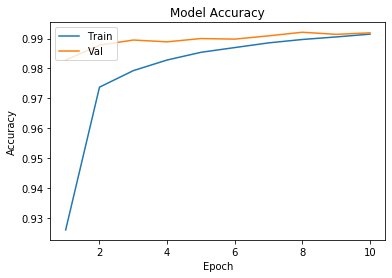

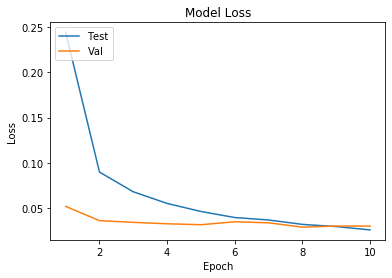

In [0]:
plot_learningcurve(history, 10)